<a href="https://colab.research.google.com/github/aurora32s/python_study/blob/master/2022%EB%85%84_1%EC%9B%94_4%EC%A3%BC%EC%B0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 수들의 합(1789번)

## 문제
서로 다른 N개의 자연수의 합이 S라고 한다. S를 알 때, 자연수 N의 최댓값은 얼마일까?

## 입력
첫째 줄에 자연수 S(1<=S<=4,294,967,295)가 주어진다.

## 출력
첫째 줄에 자연수 N의 최댓값을 출력한다.

In [ ]:
s = int(input()) # 합 S

sum = 0
answer = 0
while sum <= s :
  answer += 1
  sum += answer

print(answer-1)

200
19


# 사탕 게임(3085번)

## 문제
상근이는 어렸을 적에 "봄보니(Bomboni)" 게임을 즐겨했다.

가장 처음에 NxN 크기에 사탕을 채워 놓는다. 사탕의 색은 모두 같지 않을 수도 있다. 상근이는 사탕의 색이 다른 인접한 두 칸을 고른다. 그 다음 고른 칸에 들어있는 사탕을 서로 교환한다. 이제 모두 같은 색으로 이루어져 있는 가장 긴 연속 부분(행 또는 열)을 고르 다음 그 사탕을 모두 먹는다.

사탕이 채워진 상태가 주어졌을 때, 상근이가 먹을 수 있는 사탕의 최대 개수를 구하는 프로그램을 작성하시오.

## 입력
첫째 줄에 보드의 크기 N이 주어진다. (3<=N<=50)

다음 N개 줄에는 보드에 채워져 있는 사탕의 색상이 주어진다. 빨간색은 C, 파란색은 P, 초록색은 Z, 노란색은 Y로 주어진다.

사탕의 색이 다른 인접한 두 칸이 존재하는 입력만 주어진다.

## 출력
첫째 줄에 상근이가 먹을 수 있는 사탕의 최대 개수를 출력한다.

In [ ]:
n = int(input())
maps = [[] for _ in range(n)]

for i in range(n) :
  row = input()
  for column in row :
    maps[i].append(column)

# 자리를 바꿀 수 있는 경우 true 반환
def diff (x,y,nx,ny) :
  if nx<0 or n<=nx or ny<0 or n<=ny :
    return False
  return (maps[y][x] != maps[ny][nx])

def maxRows (y) : # 행의 최대 길이
  color = maps[y][0]
  result = 0
  length = 1
  for x in range(1,n) :
    if maps[y][x] == color :
      length += 1
    else :
      result = max(result, length)
      length = 1
      color = maps[y][x]
  result = max(result, length)
  return result

def maxColumns (x) : # 열의 최대 길이
  color = maps[0][x]
  result = 0
  length = 1
  for y in range(1,n) :
    if maps[y][x] == color :
      length += 1
    else :
      result = max(result, length)
      length = 1
      color = maps[y][x]
  result = max(result, length)
  return result

# 행의 최대 값 구해두기
rows = []
for y in range(n) :
  rows.append(maxRows(y))
# 열의 최대 값 구해두기
columns = []
for x in range(n) :
  columns.append(maxColumns(x))

# 변경된 행, 열 재계산
def switch (x,y,nx,ny) :
  rows[y] = maxRows(y)
  rows[ny] = maxRows(ny)
  columns[x] = maxColumns(x)
  columns[nx] = maxColumns(nx)

answer = 0
dx = [1,0]
dy = [0,1]
for y in range(n) :
  for x in range(n) :
    for dic in range(2) :
      nx = x + dx[dic]
      ny = y + dy[dic]
      if diff(x,y,nx,ny) :
        maps[y][x],maps[ny][nx] = maps[ny][nx],maps[y][x]
        switch(x,y,nx,ny)
        maxRow, maxColumn = max(rows),max(columns)
        answer = max(answer, maxRow, maxColumn)
        maps[y][x],maps[ny][nx] = maps[ny][nx],maps[y][x]
        switch(x,y,nx,ny)

print(answer)

5
YCPZY
CYZZP
CCPPP
YCYZC
CPPZZ
4


# A->B(16953번)

## 문제
정수 A를 B로 바꾸려고 한다. 가능한 연산은 다음과 같은 두 가지이다.
- 2를 곱한다.
- 1을 수의 가장 오른쪽에 추가한다.

A를 B로 바꾸는데 필요한 연산의 최솟값을 구해보자.

## 입력
첫째 줄에 A,B(1<= A < B <= 10^9)가 주어진다.

## 출력
A를 B로 바꾸는데 필요한 연산의 최솟값에 1을 더한 값을 출력한다. 만들 수 없는 경우에는 -1을 출력한다.

In [ ]:
a,b = map(int, input().split())

def bfs () :
  q = list()
  q.append((0,a))

  while q :
    count, num = q.pop(-1)

    if num == b :
      return count + 1
    elif num > b :
      continue
    
    # 1. 2 곱하기
    q.append((count + 1, num * 2))
    # 2. 1을 수의 가장 오른쪽에 추가한다.
    q.append((count + 1, num * 10 + 1))
  
  return -1

print(bfs())

100 40021
5


# 동전 1(2293번)

## 문제
n가지 종류의 동전이 있다. 각각의 동전이 나타내는 가치는 다르다. 이 동전을 적당히 사용해서, 그 가치의 합이 k원이 되도록 하고 싶다. 그 경우의 수를 구하시오, 각각의 동전은 몇 개라도 사용할 수 있다.

사용한 동전의 구성이 같은데, 순서만 다른 것은 같은 경우이다.

## 입력
첫째 줄에 n,k가 주어진다. (1<=n<=100, 1<=k<=10,000) 다음 n개의 줄에는 각각의 동전의 가치가 주어진다. 동전의 가치는 100,000보다 작거나 같은 자연수이다.

## 출력
첫째 줄에 경우의 수를 출력한다. 경우의 수는 2^31보다 작다.

In [ ]:
n, k = map(int, input().split())
nums = [ int(input()) for _ in range(n) ]
dp = [0 for _ in range(k+1)]
dp[0] = 1
for num in nums :
  for i in range(1, k+1) :
    if i-num >= 0 :
      dp[i] += dp[i-num]

print(dp[k])

3 10
1
2
5
10


#단지번호붙이기(2667번)

## 문제
<그림1>과 같이 정사각형 모양의 지도가 있다. 1은 집이 있는 곳을, 0은 집이 없는 곳을 나타낸다. 철수는 이 지도를 가지고 연결된 집의 모임인 단지를 정의하고, 단지에 번호를 붙이려 한다. 여기서 연결되었다는 것은 어떤 집이 좌우, 혹은 아래 위로 다른 집이 있는 경우를 말한다. 대각선상에 집이 있는 경우는 연결된 것이 아니다. <그림2>는 <그림1>을 단지별로 번호를 붙인 것이다. 지도를 입력하여 단지수를 출력하고, 각 단지에 속하는 집의 수를 오름차순으로 정렬하여 출력하는 프로그램을 작성하시오.
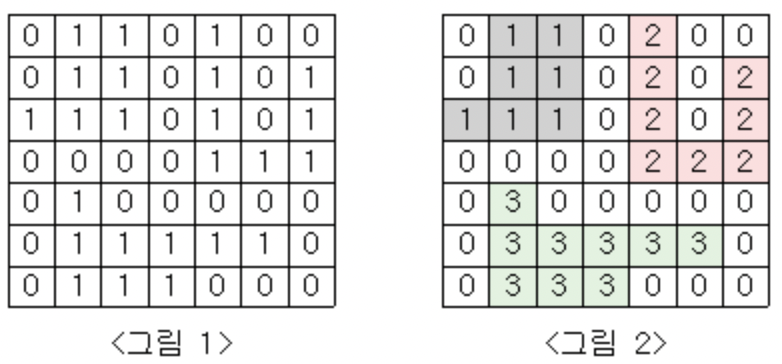

## 입력
첫 번째 줄에는 지도의 크기 N(정사각형이므로 가로와 세로의 크기는 같으며 5<=N<=25)이 입력되고, 그 다음 N 줄에는 각각 N개의 자료(0 혹은 1)가 입력된다.

## 출력
첫 번째 줄에는 총 단지수를 출력하시오. 그리고 각 단지내 집의 수를 오름차순으로 정렬하여 한 줄에 하나씩 출력하시오.

In [ ]:
n = int(input()) # 지도의 크기
maps = [input() for _ in range(n)]

dx = [0,1,0,-1]
dy = [-1,0,1,0]
visited = [[False for _ in range(n)] for _ in range(n)]
results = []
def dfs (x,y) :
  global visited
  visited[y][x] = True
  results[-1] += 1

  for dir in range(4) :
    nx = x + dx[dir]
    ny = y + dy[dir]

    if 0 <= nx < n and 0 <= ny < n and visited[ny][nx] == False and maps[ny][nx] == '1':
      dfs(nx,ny)

for y in range(n) :
  for x in range(n) :
    if visited[y][x] == False:
      if maps[y][x] == '1' :
        results.append(0)
        dfs(x,y)

results.sort()
print(len(results))
for result in results :
  print(result)

7
0110100
0110101
1110101
00001111
0100000
0111110
0111000
3
7
8
9


# 감소하는 수(1038번)

## 문제
음이 아닌 정수 X의 자릿수가 가장 큰 자릿수부터 작은 자릿수까지 감소한다면, 그 수를 감소하는 수라고 한다. 예를 들어, 321과 950은 감소하는 숮만, 322와 958은 아니다. N번째 감소하는 수를 출력하는 프로그램을 작성하시오. 0은 0번째 감소하는 수이고, 1은 1번째 감소하는 수이다. 만약 N번째 감소하는 수가 없다면 -1을 출력한다.

## 입력
첫째 줄에 N이 주어진다. N은 1,000,000보다 작거나 같은 자연수 또는 0이다.

## 출력
첫째 줄에 N번째 감소하는 수를 출력한다.

### 예제 입력 1
> 18
### 예제 출력 1
> 42
## 예제 입력 2
0
## 예제 출력 2
0
## 예제 입력 3
500000
## 예제 출력 3
-1


In [ ]:
import itertools

n = int(input())
decreasedNum = []
for number in range(1,11) :
  for comb in itertools.combinations(range(10),number) :
    comb = list(comb)
    comb.sort(reverse=True)
    decreasedNum.append(int("".join(list(map(str,comb)))))

decreasedNum.sort()
print(decreasedNum[n]) if n < len(decreasedNum) else print(-1)

18
1023
42


In [ ]:
import itertools

n = int(input())
decreasedNum = []
def solve (preNum, currentNum) :
  for num in range(preNum-1, -1, -1) :
    newNum = currentNum * 10 + num
    decreasedNum.append(newNum)
    solve(num, newNum)

for i in range(9, -1, -1) :
  decreasedNum.append(i)
  solve(i, i)

decreasedNum.sort()
print(decreasedNum[n]) if n < len(decreasedNum) else print(-1)

50000
-1


# 가르침 (1062번)

##### 시간제한 : 1초 , 메모리제한 : 128MB 
## 문제
남극에 사는 김지민 선생님은 학생들이 되도록이면 많은 단어를 읽을 수 있도록 하려고 한다. 그러나 지구온난화로 인해 얼음이 녹아서 곧 학교가 무너지기 때문에, 김지민은 K개의 글자를 가르칠 시간 밖에 없다. 김지민은 가르치고 난 후에는, 학생들은 그 K개의 글자로만 이루어진 단어만을 읽을 수 있다. 김지민은 어떤 K개의 글자를 가르쳐야 학생들이 읽을 수 있는 단어의 개수가 최대가 되는지 고민에 빠졌다.

남극언어의 모든 단어는 `anta`로 시작되고, `tica`로 끝난다. 남극언어에 단어는 N개 밖에 없다고 가정한다. 학생들이 읽을 수 있는 단어의 최댓값을 구하는 프로그램을 작성하시오.

## 입력
첫째 줄에 단어의 개수 N과 K가 주어진다. N은 작거나 같은 자연수이고, K는 26보다 작거나 같은 자연수 또는 0이다. 둘째 줄부터 N개의 줄에 남극 언어의 단어가 주어진다. 단어는 영어 소문자로만 이루어져 있고, 길이가 8보다 크거나 같고, 15보다 작거나 같다. 모든 단어는 중복되지 않는다.

## 출력
첫쨰 줄에 김지민이 K개의 글자를 가르칠 떄, 학생들이 읽을 수 있는 단어 개수의 최댓값을 출력한다.

In [5]:
from itertools import combinations

n, k = map(int, input().split())

# antatica 도 다 못 배우는 경우
if k < 5 :
  print(0)
else :
  k -= 5 # 배울 수 있는 알파벳의 개수
  subfix = {'a','n','t','i','c'}
  alphbet = {key : value for value, key in enumerate((
      set(map(chr, range(ord('a'), ord('z')+1))) - subfix
  ))}

  words = []
  for _ in range(n) :
    tmp = 0
    for c in set(input()) - subfix :
      tmp |= (1<<alphbet[c]) # 각 알파벳에 해당하는 bit on
    words.append(tmp)
  
  answer = 0
  filter = (2**i for i in range(21))
  for comb in combinations(filter, k) :
    test = sum(comb)
    count = 0
    for word in words :
      if test & word == word :
        count += 1
    
    answer = max(answer, count)

  print(answer)

9 8
antabtica
antaxtica
antadtica
antaetica
antaftica
antagtica
antahtica
antajtica
antaktica
3


# 퇴사 2(15486번)

##### 시간제한 : 2초, 메모리제한 : 512MB 
## 문제
상담원으로 일하고 있는 백준이는 퇴사를 하려고 한다.

오늘부터 N+1일째 되는 날 퇴사를 하기 위해서, 남은 N일 동안 최대한 많은 상담을 하려고 한다.

백준이는 비서에게 최대한 많은 상담을 잡으라고 부탁을 했고, 비서는 하루에 하나씩 서로 다른 사람의 상담을 잡아놓았다.

각각의 상담은 상담을 완료하는데 걸리는 기간 Ti와 상담을 했을 때 받을 수 있는 금액 Pi로 이루어져 있다.

N=7인 경우에 다음과 같은 상담 일정표를 보자.

||1일|2일|3일|4일|5일|6일|7일|
|---|---|---|---|---|---|---|---|
|Ti|3|4|1|1|2|4|2|
|Pi|10|20|10|20|15|40|200|

1일에 잡혀있는 상담은 총 3일이 걸리며, 상담했을 때 받을 수 있는 금액은 10이다. 5일에 잡혀있는 상담은 총 2일이 걸리며, 받을 수 있는 금액은 15이다.

상담을 하는데 필요한 기간은 1일보다 클 수 있기 때문에 모든 상담을 할 수 없다. 예를 들어서 1일에 상담을 하게 되면, 2일,3일에 있는 상담은 할 수 없게 된다. 2일에 있는 상담을 하게 되면, 3,4,5,6일에 잡혀있는 상담은 할 수 없다.

또한, N+1일째에는 회사에 없기 때문에, 6,7일에 있는 상담을 할 수 없다.

퇴사 전에 할 수 있는 상담의 최대 이익은 1일,4일,5일에 있는 상담을 하는 것이며, 이 떄의 이익은 10+20+15=45이다.

상담을 적절히 했을 때, 백준이가 얻을 수 있는 최대 수익을 구하는 프로그램을 작성하시오.

## 입력
첫째 줄에 N(1<=N<=1,500,000)이 주어진다.

둘째 줄부터 N개의 줄에는 Ti와 Pi가 공백으로 구분되어서 주어지며, 1일부터 N일까지 순서대로 주어진다.(1<=Ti<=50, 1<=Pi<=1,000)

## 출력
첫째 줄에 백준이가 얻을 수 있는 최대 이익을 출력한다.

In [ ]:
import sys
input = sys.stdin.readline

n = int(input())
time = [0] * (n+2)
cost = [0] * (n+2)

for i in range(1,n+1) :
  t, p = map(int, input().split())
  time[i] = t
  cost[i] = p

answer = 0
dp = [0] * (n+2)
for i in range(1, n+2) :
  answer = max(answer, dp[i])
  if i + time[i] <= n+1 :
    dp[i + time[i]] = max(answer + cost[i], dp[i + time[i]])

print(max(dp))